# yt: A Python-based Framework for Visualization and Analysis of Physical Simulations

### John ZuHone
### Harvard-Smithsonian Center for Astrophysics

<img src="images/yt_logo.svg", width="300">

This presentaion is available at the following URL as slides and a Jupyter notebook at the following URLs:

http://hea-www.cfa.harvard.edu/~jzuhone/cfa_yt_workshop/yt_intro.slides.html

The datasets I use in this presentation and throughout the day are available at the following URL:

http://yt-project.org/data

The example notebooks we'll be working through are available here:

http://github.com/jzuhone/cfa_yt_workshop/

# yt is a framework for working with the outputs of simulation codes

### visualization 

* slices
* projections
* volume rendering
* phase diagrams

### analysis 

* data selection and derived quantities
* low-level data inspection
* profiling (how does a quantity vary with radius? density?)
* and much more...

## yt supports many production astrophysical simulation codes

* SPH (Gadget, Gasoline, Tipsy, ...)
* Patch AMR (Enzo, Athena, Chombo, ...)
* Octree AMR (FLASH, ART, ...)
* Unstructured Mesh (Moab, Exodus II, ...)

## yt runs on a variety of platforms

* Operating systems: Linux, macOS, Windows (including the new Bash on Windows!)
* Runs on everything from laptops (e.g., this one) to supercomputers (e.g., NASA's Pleiades)
* Currently runs in Python 2.7 and 3.4-3.6
* Source installs and binaries are available

### Developed by a global team of astrophysics researchers to solve their real-world problems.

<div style="font-size:70%;margin-top:50px">
<table>  <tr><td>Tom Abel
    </td><td>Andrew Cunningham
    </td><td><b>Cameron Hummels</b>
    </td><td>Michael Kuhlen
    </td><td>Desika Narayanan
    </td><td>Hsi-Yu Schive
    </td><td>Ting-Wai To
  </td></tr>  <tr><td>Gabriel Altay
    </td><td><b>Bili Dong</b>
    </td><td><b>Suoqing Ji</b>
    </td><td>Meagan Lang
    </td><td>Kaylea Nelson
    </td><td><b>Anthony Scopatz</b>
    </td><td>Joseph Tomlinson
  </td></tr>  <tr><td><b>Kenza Arraki</b>
    </td><td>Nicholas Earl
    </td><td><b>Allyson Julian</b>
    </td><td>Eve Lee
    </td><td><b>Brian O'Shea</b>
    </td><td>Noel Scudder
    </td><td>Stephanie Tonnesen
  </td></tr>  <tr><td>Kirk Barrow
    </td><td><b>Hilary Egan</b>
    </td><td>Anni Järvenpää
    </td><td>Doris Lee
    </td><td><b>J.S. Oishi</b>
    </td><td><b>Sam Skillman</b>
    </td><td><b>Matthew Turk</b>
  </td></tr>  <tr><td>Ricarda Beckmann
    </td><td>Rasmi Elasmar
    </td><td>Christian Karch
    </td><td><b>Sam Leitner</b>
    </td><td>JC Passy
    </td><td><b>Stephen Skory</b>
    </td><td><b>Casey W. Stark</b>
  </td></tr>  <tr><td>Elliott Biondo
    </td><td>Daniel Fenn
    </td><td>Max Katz
    </td><td>Stuart Levy
    </td><td>John Regan
    </td><td>Aaron Smith
    </td><td>Miguel de Val-Borro
  </td></tr>  <tr><td>Alex Bogert
    </td><td>John Forbes
    </td><td><b>BW Keller</b>
    </td><td>Yuan Li
    </td><td>Mark Richardson
    </td><td><b>Britton Smith</b>
    </td><td>Rick Wagner
  </td></tr>  <tr><td>Robert Bradshaw
    </td><td>Sam Geen
    </td><td>Ji-hoon Kim
    </td><td>Joshua Moloney
    </td><td>Sherwood Richers
    </td><td>Geoffrey So
    </td><td>Mike Warren
  </td></tr>  <tr><td>Yi-Hao Chen
    </td><td>Adam Ginsburg
    </td><td>Steffen Klemer
    </td><td><b>Christopher Moody</b>
    </td><td>Thomas Robitaille
    </td><td>Antoine Strugarek
    </td><td>Andrew Wetzel
  </td></tr>  <tr><td>Pengfei Chen
    </td><td><b>Nathan Goldbaum</b>
    </td><td>Fabian Koller
    </td><td>Stuart Mumford
    </td><td>Anna Rosen
    </td><td>Elizabeth Tasker
    </td><td><b>John Wise</b>
  </td></tr>  <tr><td>David Collins
    </td><td>Eric Hallman
    </td><td><b>Kacper Kowalik</b>
    </td><td><b>Andrew Myers</b>
    </td><td>Chuck Rozhon
    </td><td>Benjamin Thompson
    </td><td><b>Michael Zingale</b>
  </td></tr>  <tr><td><b>Brian Crosby</b>
    </td><td>David Hannasch
    </td><td>Mark Krumholz
    </td><td><b>Jill Naiman</b>
    </td><td><b>Douglas Rudd</b>
    </td><td>Robert Thompson
    </td><td><b>John ZuHone</b>  </td></tr></table>
</div>

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

IFrame('http://yt-project.org/docs/dev/reference/code_support.html', width=960, height=600)

## Sample datasets loadable by yt

In [2]:
IFrame('http://yt-project.org/data', width=700, height=500)

# What is yt? 
## Getting started with the Basics

(slides adapted from Britton Smith's PyAstro 16 talk and a recent talk by Nathan Goldbaum at McMaster University)

### Eulerian, gridded, AMR/SMR data vs. Lagrangian, particle-based, SPH data
<img src="images/amr_sample.png", align="left" width=400>
<img src="images/sph_sample.png", align="right" width=400>

## Data on disk has no inherent physical meaning

<img src="images/grid_nonphysical.png", width='600px'>

## yt lets you think about the data using a *physically motivated interface*

<img src="images/grid_physical_dimensions.png", width='650px'>

## yt lets you think about the data using a *physically motivated interface*

### yt's most fundamental concepts:

* Data Objects

* Fields

* Units

* Derived Quantities

## yt lets you think about the data using a *physically motivated interface*

In [3]:
import yt
ds = yt.load("Enzo_64/DD0043/data0043")

yt : [INFO     ] 2017-03-06 13:22:44,487 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2017-03-06 13:22:44,488 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2017-03-06 13:22:44,491 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-03-06 13:22:44,494 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-03-06 13:22:44,496 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-03-06 13:22:44,498 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2017-03-06 13:22:44,501 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-03-06 13:22:44,503 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-03-06 13:22:44,505 Parameters: hubble_constant           = 0.71


## Allowing you to forget about what your data looks like as a file format

<img src="images/grid_physical_sphere.png", width="650px">

## And select only the data you want to select

<img src="images/grid_selected_cells.png", width='700px'>

# Data Objects
<img src="images/data_containers.png", style="width:60%">

## Physical objects to select data are called "data objects"

<img src="images/selected_data.png", width='300px'>

In [4]:
sp = ds.sphere("max", (2.0, "Mpc"))

Parsing Hierarchy : 100%|██████████| 752/752 [00:00<00:00, 21983.12it/s]
yt : [INFO     ] 2017-03-06 13:22:44,607 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2017-03-06 13:22:46,292 Max Value is 6.27892e-27 at 0.2026367187500000 0.5463867187500000 0.1127929687500000


## yt natively deals with multiresolution data

<img src="images/unrolled_data.png">

## Data from each selected cell is returned as a flat, 1D array, with unit metadata attached

<img src="images/density_unrolled.png">

In [5]:
print(sp['density'])

[  1.24345086e-28   1.64172032e-28   2.20089000e-28 ...,   2.84074089e-28
   2.95368516e-28   2.43785793e-28] g/cm**3


## Data objects can be queried for many fields

<img src="images/unrolled_temperature.png">

In [6]:
print(sp['temperature'])

[ 70627086.64375737  74626400.46499644  65684867.2690043  ...,
  71208750.84769161  61978852.69668136  69292321.98182029] K


# Spatial information is not lost

<img src="images/unrolled_x.png">

In [7]:
sp['x']

YTArray([ 0.19580078,  0.19580078,  0.19580078, ...,  0.20849609,
        0.20849609,  0.20849609]) code_length

In [8]:
sp['x'].in_units('kpc')

YTArray([ 35250.18915688,  35250.18915688,  35250.18915688, ...,
        37535.73758101,  37535.73758101,  37535.73758101]) kpc

# Spatial information is not lost

<img src="images/unrolled_dx.png">

In [9]:
import numpy as np

np.unique(sp['dx']).in_units('kpc')

YTArray([ 175.81141724,  351.62283448]) kpc

In [11]:
import yt.units as u

ad = ds.all_data()

box = ds.box(ds.domain_left_edge + 500*u.kpc, ds.domain_right_edge - 500*u.kpc)

sp = ds.sphere(ds.domain_center, 500*u.kpc)

disk = ds.disk(ds.domain_center, [0, 0, 1], 500*u.kpc, 100*u.kpc)

ray = ds.ray(ds.domain_left_edge, ds.domain_right_edge)

# Fields

## Data objects can be queried for many fields

In [12]:
from pprint import pprint

# fields that are defined in the on-disk data file
pprint(ds.field_list)

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'GasEnergy'),
 ('enzo', 'Temperature'),
 ('enzo', 'TotalEnergy'),
 ('enzo', 'x-velocity'),
 ('enzo', 'y-velocity'),
 ('enzo', 'z-velocity'),
 ('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'metallicity_fraction'),
 ('io', 'particle_index'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_type'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z')]


## Data objects can be queried for many fields

In [13]:
# fields that yt can calculate given the fields in ds.field_list
# (only showing gas fields to fit on one screen)
pprint([f for f in ds.derived_field_list if f[0]=='gas'][:20])

[('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'baryon_overdensity'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'cylindrical_radial_velocity'),
 ('gas', 'cylindrical_radial_velocity_absolute')]


## Particle fields

In [14]:
pprint([f for f in ds.field_list if f[0]=='io'])

[('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'metallicity_fraction'),
 ('io', 'particle_index'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_type'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z')]


In [15]:
ad = ds.all_data()

print(ad['io', 'particle_position'])
print(ad['io', 'particle_mass'])

[[ 0.01247314  0.02817283  0.00718884]
 [ 0.03054362  0.03010176  0.01568012]
 [ 0.05328128  0.03367998  0.02378331]
 ..., 
 [ 0.69516099  0.14786876  0.69971964]
 [ 0.6951684   0.14845268  0.69637335]
 [ 0.69202931  0.14982161  0.69538709]] code_length
[  3.17891439e-06   3.17891439e-06   3.17891439e-06 ...,   3.17891439e-06
   3.17891439e-06   3.17891439e-06] code_mass


## Derived Fields: create new fields by defining a python function

In [16]:
from yt.units import kboltz, mh

def my_entropy(field, data):
    return (kboltz * data['temperature'] / data['number_density']**(2./3.))

ds.add_field('entropy', function=my_entropy, units="keV*cm**2")

## Derived Fields: create new fields by defining a python function

<img src="images/unrolled_entropy.png", width=800px>

In [17]:
sp['entropy']

YTArray([ 0.00369545,  0.00384657,  0.00355336,  0.00356309,  0.00423567,
        0.00426858,  0.00440043,  0.00417604]) cm**2*keV

## yt employs a field "democracy"

* Fields on-disk and derived fields are treated in exactly the same way
* Accessed the same way, visualized the same way
* On-disk fields are mapped to a set of common fields, to faciliate using the same scripts across different datasets

In [18]:
print(sp["gas","density"])

[  1.88471165e-31   1.77474599e-31   1.99887902e-31   1.99070341e-31
   1.53589715e-31   1.51817303e-31   1.45045366e-31   1.56891328e-31] g/cm**3


In [19]:
print(sp["enzo","Density"]) # These are the same field, just aliased

[ 0.06605606  0.06220194  0.07005744  0.06977089  0.05383068  0.05320948
  0.05083603  0.05498784] code_mass/code_length**3


In [20]:
print(sp["enzo","Density"].in_cgs())

[  1.88471165e-31   1.77474599e-31   1.99887902e-31   1.99070341e-31
   1.53589715e-31   1.51817303e-31   1.45045366e-31   1.56891328e-31] g/cm**3


# Units

## We've already seen how data objects return fields as unit-aware NumPy arrays

<img src="images/unrolled_pressure.png", width=80%>

In [21]:
pressure = sp['density']*sp['temperature']*kboltz/(0.6*mh)

pressure.in_units('Pa')

YTArray([  2.59113552e-24,   2.43995275e-24,   2.74809488e-24,
         2.73685491e-24,   2.11157907e-24,   2.08721163e-24,
         1.99410981e-24,   2.15697023e-24]) Pa

In [22]:
pressure.in_units('dyne/cm**2')

YTArray([  2.59113552e-23,   2.43995275e-23,   2.74809488e-23,
         2.73685491e-23,   2.11157907e-23,   2.08721163e-23,
         1.99410981e-23,   2.15697023e-23]) dyne/cm**2

# NumPy-like Operations

## NumPy-like operations turn fields into single values

<img src="images/unrolled_cell_mass.png">

In [23]:
sp['cell_mass']

YTArray([  1.54066329e+43,   1.45077153e+43,   1.30719181e+44,
         1.30184527e+44,   1.00441905e+44,   9.92828146e+43,
         9.48542218e+43,   1.02601036e+44]) g

## Derived quantities turn fields into single values

<img src="images/summed_cell_mass.png", width=650px>

\begin{equation}
M = \sum_i m_i
\end{equation}

In [24]:
sp.sum('cell_mass')

6.879980338113286e+44 g

In [25]:
print(sp.mean("density"))

1.7153096485038848e-31 g/cm**3


In [26]:
sp.argmax("temperature")

(0.50390625 code_length, 0.50390625 code_length, 0.49609375 code_length)

In [27]:
sp.argmax("temperature", axis=["density", "velocity_magnitude"])

[1.8847116489164522e-31 g/cm**3, 9814257.02073275 cm/s]

# Visualization and analysis
* SlicePlot, ProjectionPlot, ParticleProjectionPlot
* ProfilePlot, PhasePlot
* Slices, projections, profiles, covering grids, and fixed resolution buffers


## SlicePlot

In [28]:
from yt import SlicePlot
units_override = {"length_unit": (1.0, "Mpc"), "mass_unit": (1.0e14, "Msun"), "time_unit": (1.0, "Myr")}
ds2 = yt.load("MHDSloshing/virgo_low_res.0054.vtk", units_override=units_override)
slc = SlicePlot(ds2, 'z', ('gas', 'temperature'), center='c', width=(1.5, "Mpc"))

yt : [INFO     ] 2017-03-06 13:22:51,833 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2017-03-06 13:22:51,840 Overriding code units. This is an experimental and potentially dangerous option that may yield inconsistent results, and must be used very carefully, and only if you know what you want from it.
yt : [INFO     ] 2017-03-06 13:22:51,841 Overriding length_unit: 1 Mpc.
yt : [INFO     ] 2017-03-06 13:22:51,844 Overriding time_unit: 1 Myr.
yt : [INFO     ] 2017-03-06 13:22:51,851 Overriding mass_unit: 1e+14 Msun.
yt : [INFO     ] 2017-03-06 13:22:51,864 Parameters: current_time              = 2700.111
yt : [INFO     ] 2017-03-06 13:22:51,866 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2017-03-06 13:22:51,869 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2017-03-06 13:22:51,871 Parameters: domain_right_edge         = [ 2.  2.  2.]
yt : [INFO   


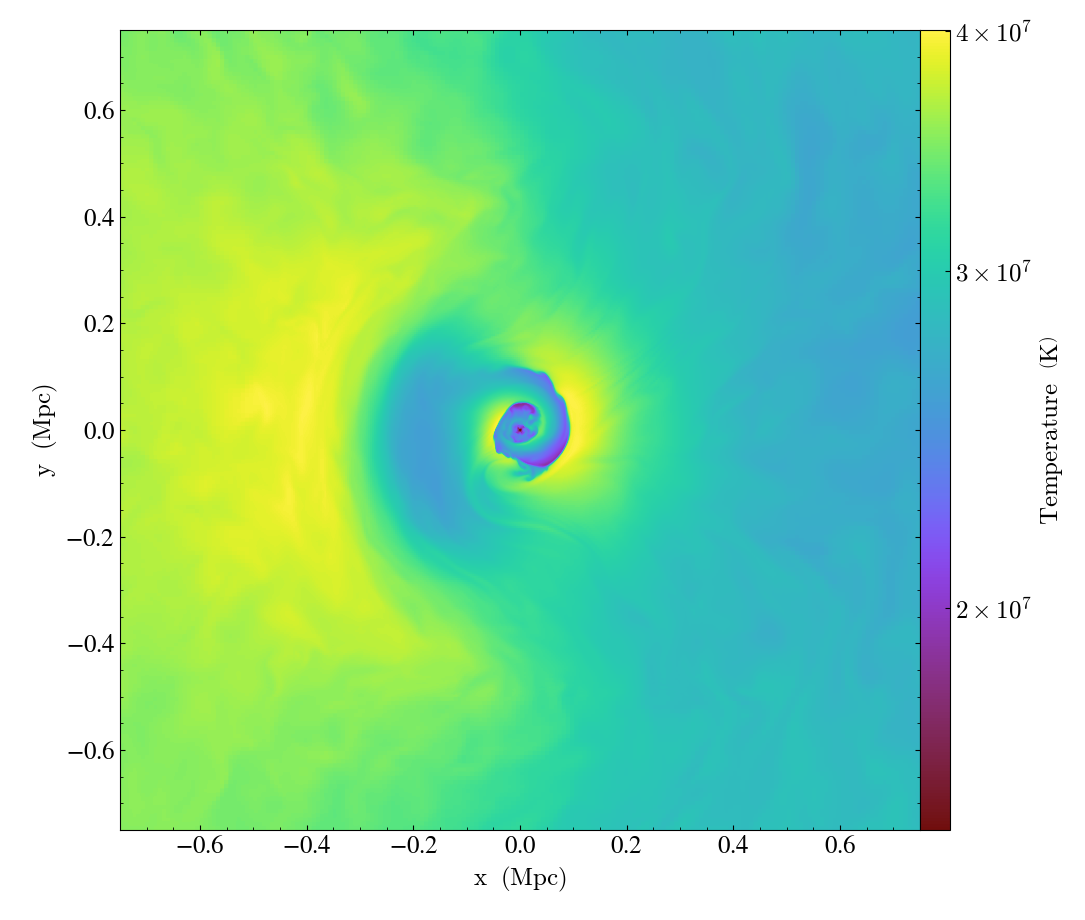

In [29]:
slc.show()

### Plot callbacks


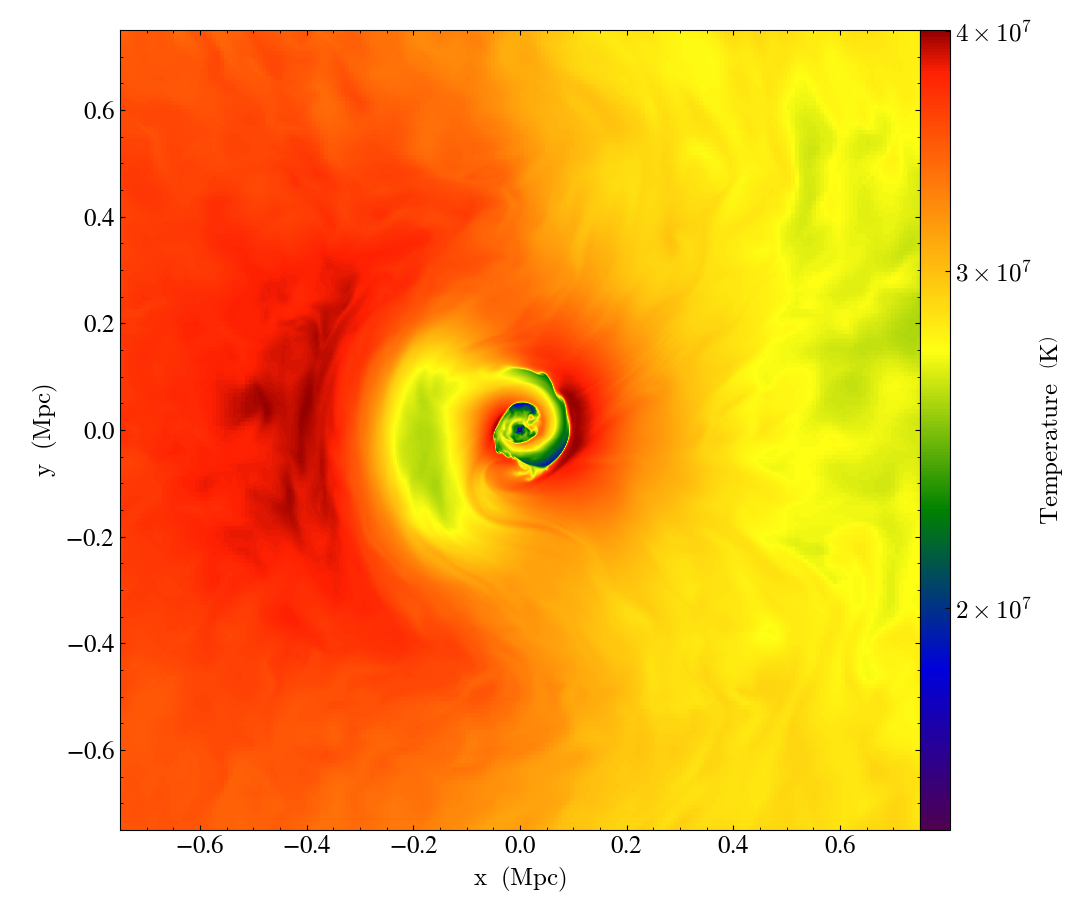

In [30]:
slc.set_cmap('temperature', 'algae')


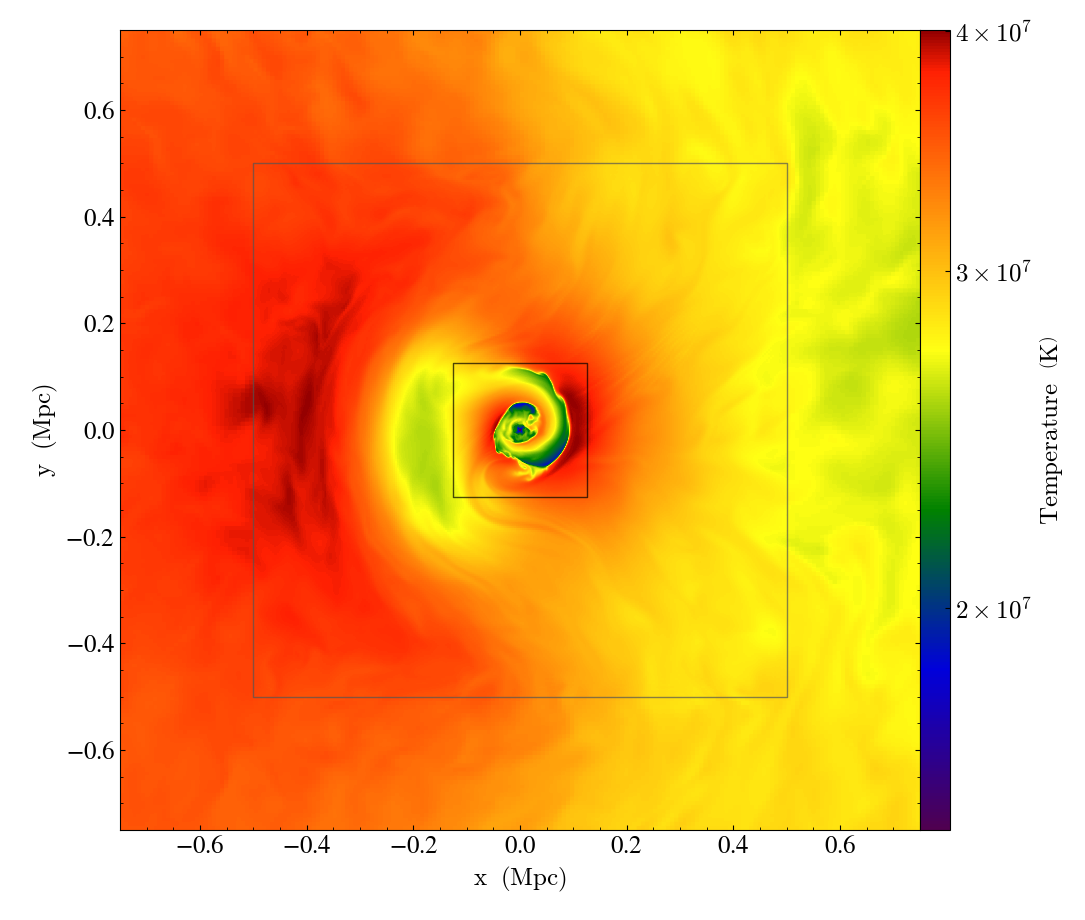

In [31]:
slc.annotate_grids()


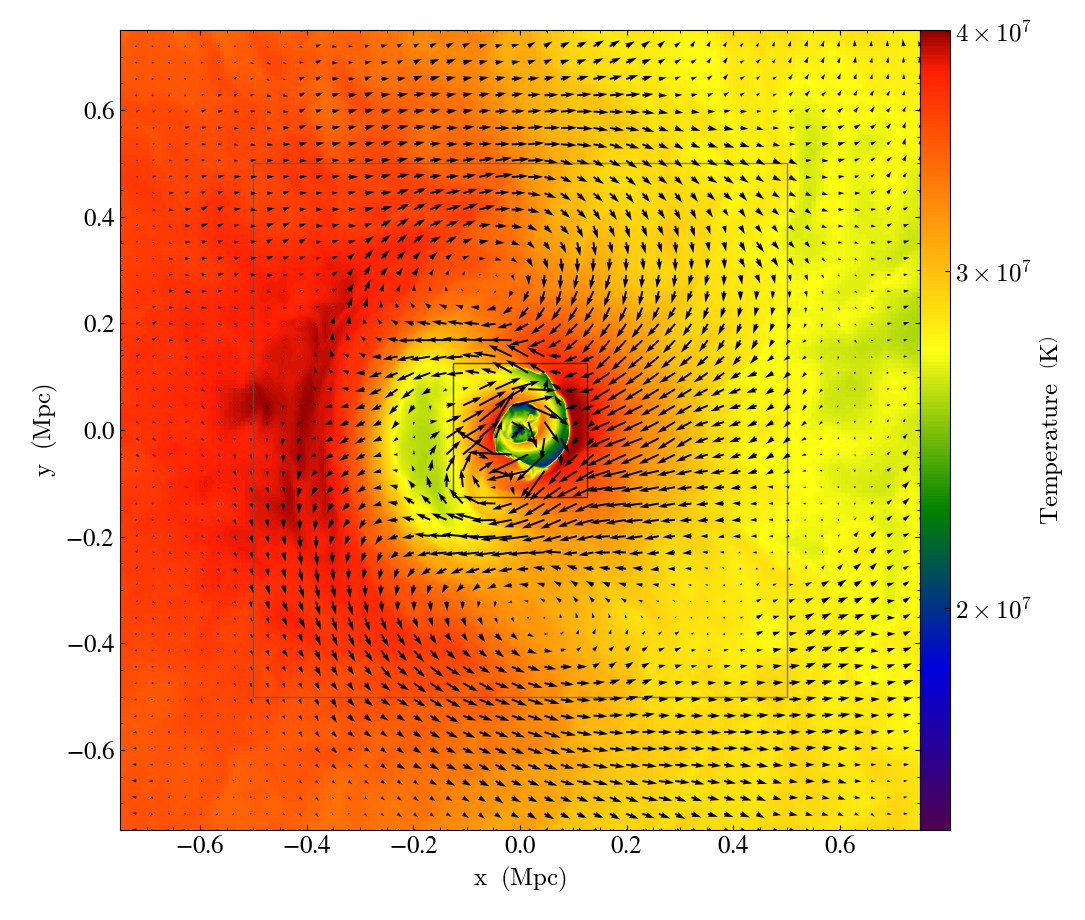

In [32]:
slc.annotate_velocity()


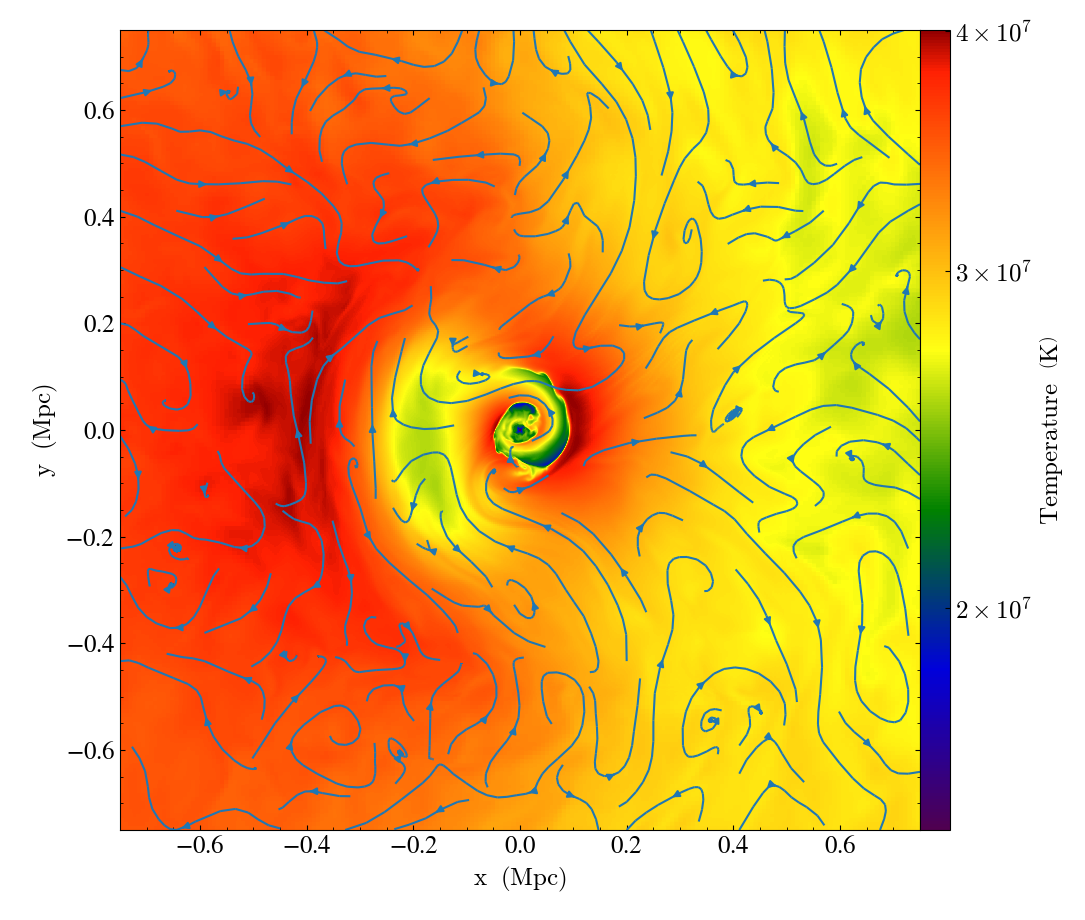

In [33]:
slc.annotate_clear()
slc.annotate_streamlines('magnetic_field_x', 'magnetic_field_y')


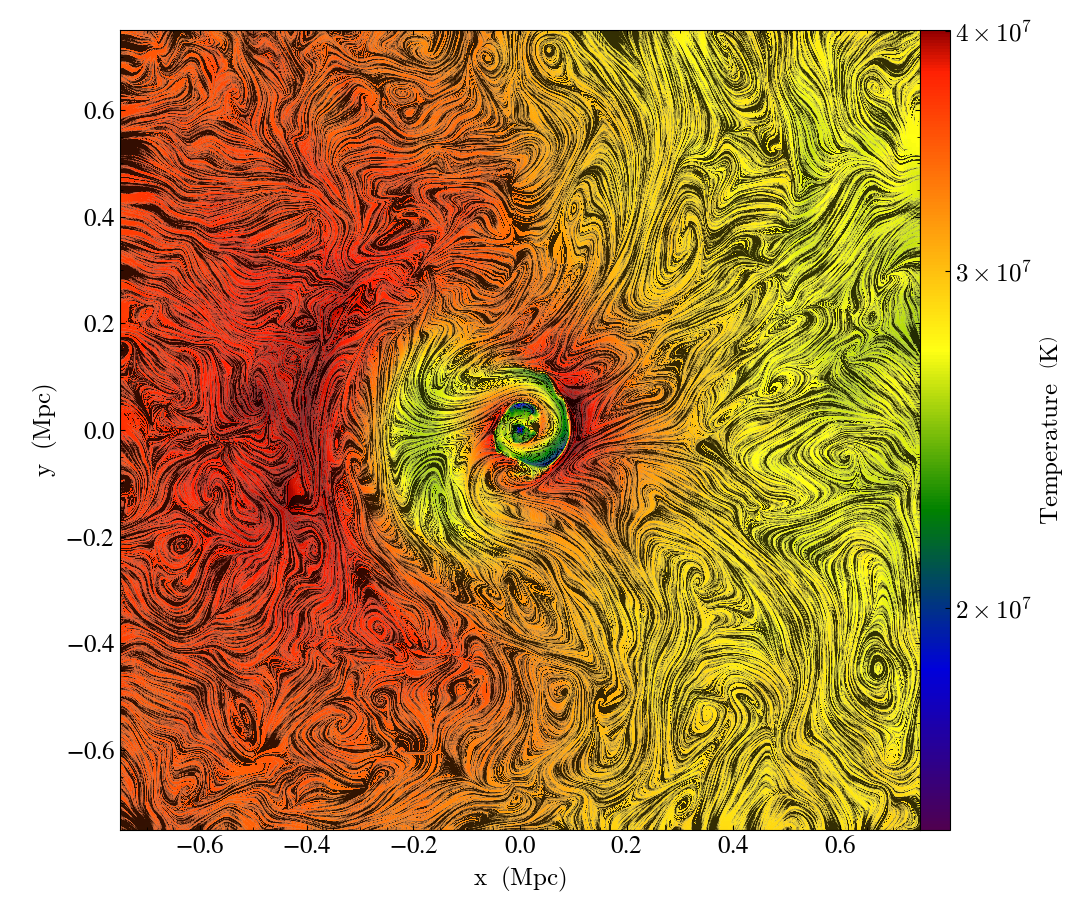

In [34]:
slc.annotate_clear()
slc.annotate_line_integral_convolution('magnetic_field_x', 'magnetic_field_y')

## ProjectionPlot

In [35]:
from yt import ProjectionPlot

prj = ProjectionPlot(ds, "y", 'density', center="max")

yt : [INFO     ] 2017-03-06 13:23:23,096 Max Value is 6.27892e-27 at 0.2026367187500000 0.5463867187500000 0.1127929687500000
yt : [INFO     ] 2017-03-06 13:23:23,360 Projection completed
yt : [INFO     ] 2017-03-06 13:23:23,361 xlim = -0.387207 0.612793
yt : [INFO     ] 2017-03-06 13:23:23,363 ylim = -0.297363 0.702637
yt : [INFO     ] 2017-03-06 13:23:23,367 xlim = -0.387207 0.612793
yt : [INFO     ] 2017-03-06 13:23:23,369 ylim = -0.297363 0.702637
yt : [INFO     ] 2017-03-06 13:23:23,374 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



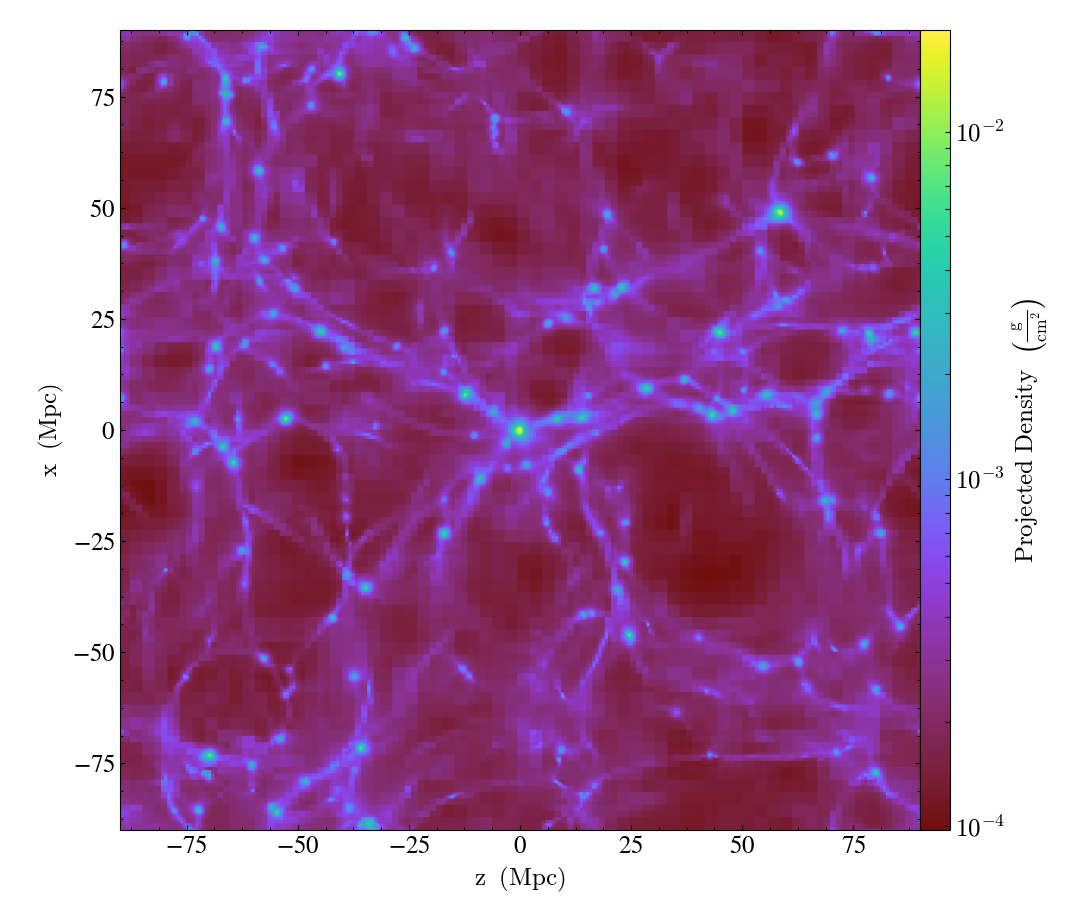

In [36]:
prj

yt : [INFO     ] 2017-03-06 13:23:24,588 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



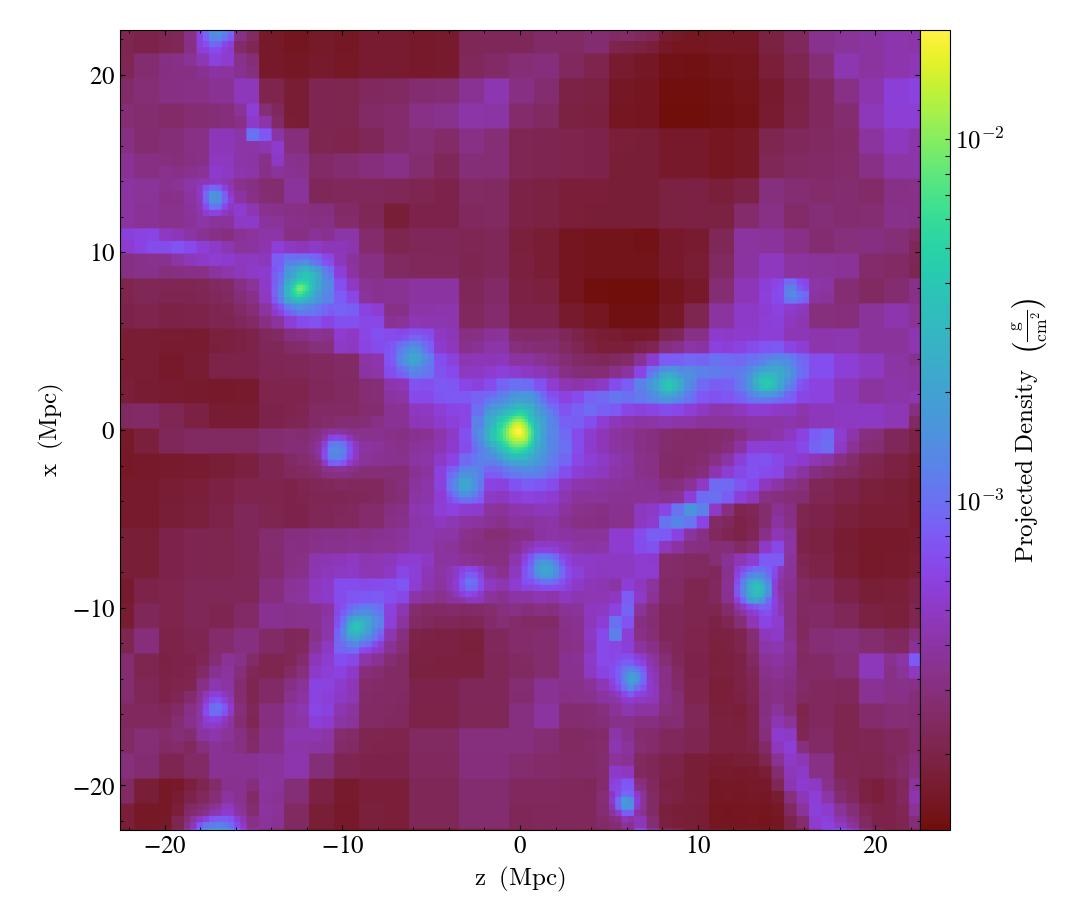

In [37]:
prj.zoom(4)

In [38]:
sp = ds.sphere("max", (10.0, 'Mpc'))

prj = ProjectionPlot(ds, "y", 'density', data_source=sp, center='max')

yt : [INFO     ] 2017-03-06 13:23:25,601 Max Value is 6.27892e-27 at 0.2026367187500000 0.5463867187500000 0.1127929687500000
yt : [INFO     ] 2017-03-06 13:23:25,798 Max Value is 6.27892e-27 at 0.2026367187500000 0.5463867187500000 0.1127929687500000
yt : [INFO     ] 2017-03-06 13:23:25,832 Projection completed
yt : [INFO     ] 2017-03-06 13:23:25,834 xlim = -0.387207 0.612793
yt : [INFO     ] 2017-03-06 13:23:25,835 ylim = -0.297363 0.702637
yt : [INFO     ] 2017-03-06 13:23:25,838 xlim = -0.387207 0.612793
yt : [INFO     ] 2017-03-06 13:23:25,841 ylim = -0.297363 0.702637
yt : [INFO     ] 2017-03-06 13:23:25,845 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



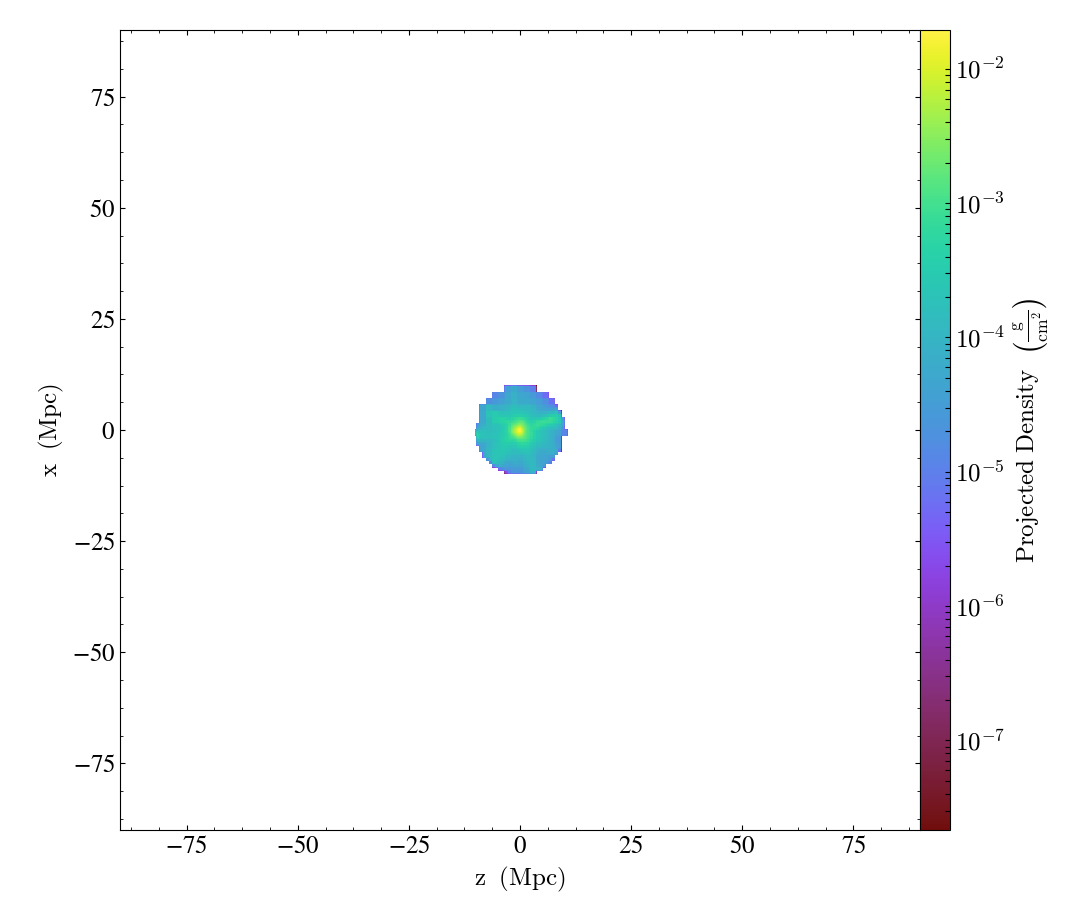

In [39]:
prj

In [40]:
prj = ProjectionPlot(ds2, 2, 'kT', weight_field='density', width=(1.5, 'Mpc'))

yt : [INFO     ] 2017-03-06 13:23:43,797 Projection completed
yt : [INFO     ] 2017-03-06 13:23:43,805 xlim = -0.750000 0.750000
yt : [INFO     ] 2017-03-06 13:23:43,807 ylim = -0.750000 0.750000
yt : [INFO     ] 2017-03-06 13:23:43,810 xlim = -0.750000 0.750000
yt : [INFO     ] 2017-03-06 13:23:43,812 ylim = -0.750000 0.750000
yt : [INFO     ] 2017-03-06 13:23:43,817 Making a fixed resolution buffer of (('gas', 'kT')) 800 by 800



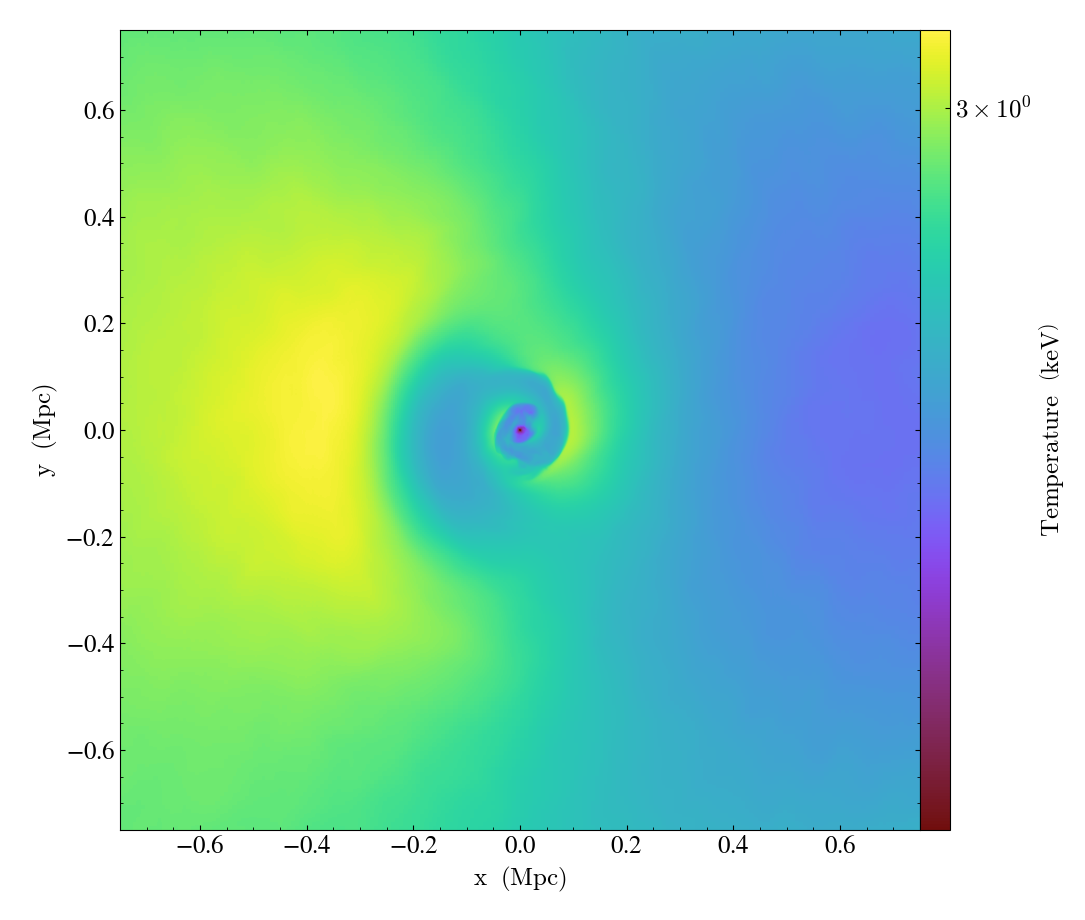

In [41]:
prj.show()

###  PhasePlot and ProfilePlot

In [42]:
from yt import PhasePlot, ProfilePlot
pp = PhasePlot(ds.all_data(), 'density', 'temperature', 'cell_mass', 
               weight_field=None, fractional=True)


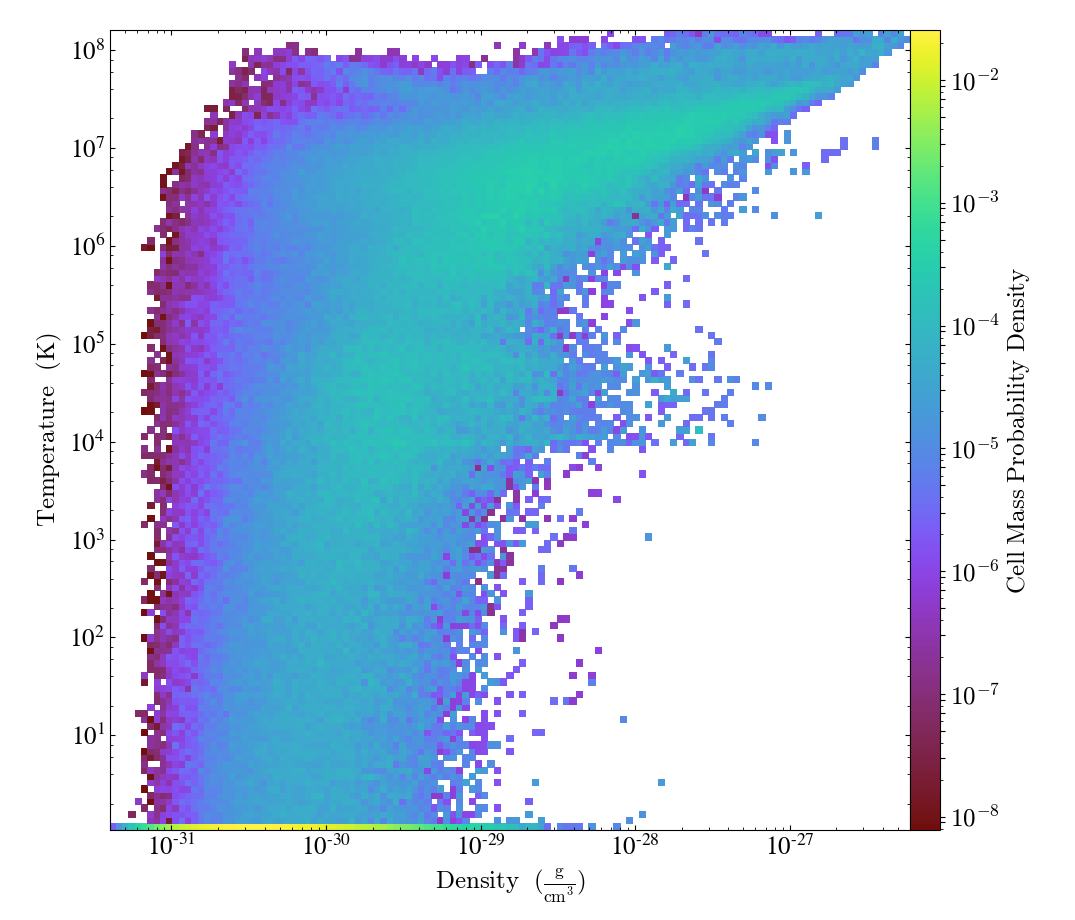

In [43]:
pp.show()


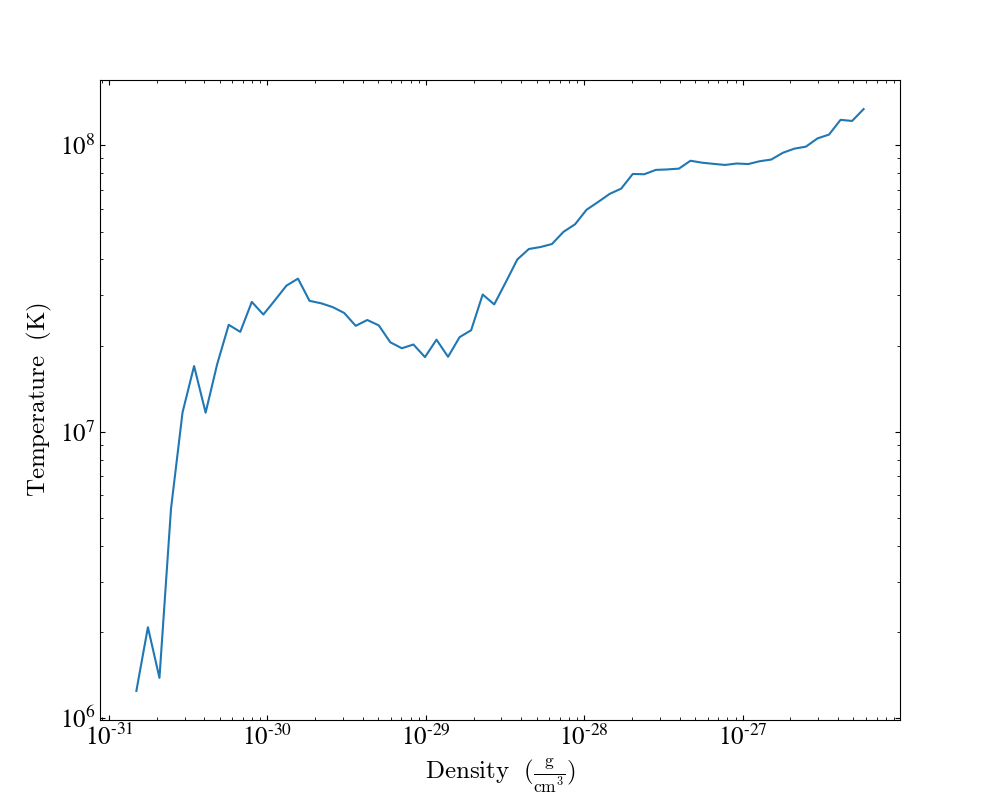

In [44]:
ProfilePlot(sp, "density", "temperature", n_bins=64)

## Community

<img src="images/community.png", width='50%'>

* Over 20,000 changesets since 2007 by over 100 unique contributors
* 350 subscribers to users mailing list, 120 subscribers to developer mailing list
* Funding for aspects of yt development comes from the NSF, NASA, and the Gordon and Betty Moore Foundation

## Getting involved and asking for help

Documentation: http://yt-project.org/doc

Users mailing list: http://lists.spacepope.org/listinfo.cgi/yt-users-spacepope.org

Developer mailing list: http://lists.spacepope.org/listinfo.cgi/yt-dev-spacepope.org

Developer guide: http://yt-project.org/docs/dev/developing/index.html

Slack Channel: https://yt-project.slack.com

IRC Channel: http://yt-project.org/irc.html (or #yt on freenode with your favorite IRC client)